In [158]:
import pandas as pd
import math, datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader as pdr
import yfinance as yf

# Set up the Yahoo Finance API
df = yf.download("AAPL", start="2020-01-01", end="2024-01-27")

[*********************100%%**********************]  1 of 1 completed


In [159]:
df = df[['Open','High','Low','Close','Volume',]]
df['HL_PCT'] = (df['High'] - df['Close']) / df['Close'] * 100.0
df['PCT_CHANGE'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

df = df[['Close','HL_PCT','PCT_CHANGE','Volume']]
df

,Close,HL_PCT,PCT_CHANGE,Volume
Date,,,,
2020-01-02,75.087502,0.083236,1.387394,135480400
2020-01-03,74.357498,1.059071,0.094228,146322800
2020-01-06,74.949997,0.053370,2.045672,118387200
2020-01-07,74.597504,0.841174,-0.483585,108872000
2020-01-08,75.797501,0.412283,2.029209,132079200
...,...,...,...,...
2024-01-22,193.889999,0.742690,0.826831,60133900
2024-01-23,195.179993,0.292042,0.082037,42355600
2024-01-24,194.500000,0.966583,-0.470780,53631300


In [162]:

df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.1*len(df)))


df['label'] = df['Close'].shift(-forecast_out)
df

,Close,HL_PCT,PCT_CHANGE,Volume,label
Date,,,,,
2020-01-02,75.087502,0.083236,1.387394,135480400,80.462502
2020-01-03,74.357498,1.059071,0.094228,146322800,80.834999
2020-01-06,74.949997,0.053370,2.045672,118387200,81.279999
2020-01-07,74.597504,0.841174,-0.483585,108872000,80.580002
2020-01-08,75.797501,0.412283,2.029209,132079200,82.875000
...,...,...,...,...,...
2024-01-22,193.889999,0.742690,0.826831,60133900,NaN
2024-01-23,195.179993,0.292042,0.082037,42355600,NaN
2024-01-24,194.500000,0.966583,-0.470780,53631300,NaN


In [ ]:
X = np.array(df.drop(columns = 'label'))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])
y =y[0:len(X)]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)


C:\Users\I7\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.



LinearRegression(n_jobs=-1)

In [ ]:
accuracy = clf.score(X_test,y_test)
forecast_set = clf.predict(X_lately)
print(forecast_set,accuracy, forecast_out)

[122.86258485 122.93477895 124.02855843 121.51880817 120.77650888
 121.29662794 122.24867797 117.09182072 121.61752358 111.67258984
 114.66506782 116.32120557 117.80403646 122.28035256 121.86059973
 123.44852343 120.27660773 123.75613013 123.81251221 123.56495326
 125.87592442 125.76143585 125.03113347 124.5529342  123.24072198
 119.8405939 ] 0.737796007769048 26


In [ ]:
df['Forecast'] = np.nan


last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day


for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]


In [ ]:
df

,Close,HL_PCT,PCT_CHANGE,Volume,label,Forecast
Date,,,,,,
2020-01-02 00:00:00,75.087502,0.083236,1.387394,135480400.0,80.387497,NaN
2020-01-03 00:00:00,74.357498,1.059071,0.094228,146322800.0,79.902496,NaN
2020-01-06 00:00:00,74.949997,0.053370,2.045672,118387200.0,81.800003,NaN
2020-01-07 00:00:00,74.597504,0.841174,-0.483585,108872000.0,81.217499,NaN
2020-01-08 00:00:00,75.797501,0.412283,2.029209,132079200.0,81.237503,NaN
...,...,...,...,...,...,...
2020-12-15 02:00:00,NaN,NaN,NaN,NaN,NaN,125.761436
2020-12-16 02:00:00,NaN,NaN,NaN,NaN,NaN,125.031133
2020-12-17 02:00:00,NaN,NaN,NaN,NaN,NaN,124.552934


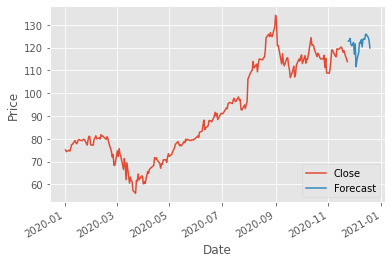

In [ ]:
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


